The lorenz model is:

dx/dt = o (y - x)

dy/dt = rx - y - xz

dz/dt = xy - bz

where o, r and b are positive constants.

x measures the rate of convective overturning, and y and z measure the horizontal and vertical temperature gradients.

The parameters o and b depend on the fluid properties and the geometry of the container. Commonly the values o = 10 and b = 8/3 are used.

The parameter r is proportional to the applied temperature gradient.

A program, called 'lorenz', which solved the Lorenz model using adaptive Runge-Kutta method is outlined here:

1. Set initial state [x,y,z] and parameters [r,o,b]
2. Loop over the desired number of steps
    - Record values of x, y, z, t, and r for plotting
    - Find new state using rka, the adaptive Runge-Kutta function
3. Print maximum and minimum time step returned by rka
4. Graph the time series x(t)
5. Graph the (x,y,z) phase space trajectory

The function 'lorzrk' specifies the three equations for the lorenz model for use in the Runge-Kutta routines. It can be seen below:

- Inputs: x(t), t (not used), [r,o,b]
- Output: dx(t)/dt
- Compute dx(t)/dt = [dx/dt dy/dt dz/dt]

Exercise 20:

Try running the lorenz program with the following values for the parameter r:

(a) 0, (b) 1, (c) 14, (d) 20, (e) 100. Use the initial condition [x y z] = [1 1 20].

Describe the different types of behavior found and compare with Figure 3.13.


In [ ]:
# Predictor-correcter method
# Sammenlign med analytisk
# Pendulum til mandag

import numpy as np
import matplotlib.pyplot as plt

def lorzrk(state, t, r, o, b): #lorenz equations
    x, y, z = state
    dxdt = o * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return np.array([dxdt, dydt, dzdt])

def runge_kutta_fourth_order(f_0, dt, t_max, r,o,b):
    t_values = np.arange(0, t_max, dt)
    f_values = [f_0]

    for i in range(1, len(t_values)):
        t_i = t_values[i-1]
        f_i = f_values[i - 1]

        k1 = lorzrk(f_i, t_i, r,o,b)
        k2 = lorzrk(f_i + 0.5 * k1 * dt, t_i + 0.5 * dt,r,o,b)
        k3 = lorzrk(f_i + 0.5 * k2 * dt, t_i + 0.5 * dt,r,o,b)
        k4 = lorzrk(f_i + k3 * dt, t_i + dt,r,o,b)

        f_new = f_i + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * dt
        f_values.append(f_new)

    return t_values, f_values

def lorenz_program(r_values, initial_state, t_max, dt, o, b):
    for r in r_values:
        t_values, f_values = runge_kutta_fourth_order(initial_state, dt, t_max, r, o, b)

        x_values = [f[0] for f in f_values]
        y_values = [f[1] for f in f_values]
        z_values = [f[2] for f in f_values]

        print(f_values)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(t_values, x_values, label='x(t)')
        plt.xlabel('Time')
        plt.ylabel('x')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(x_values, z_values, label='Phase Space')
        plt.xlabel('x')
        plt.ylabel('z')
        plt.legend()
        
        plt.suptitle(f"Lorenz Model: r = {r}")
        plt.show()

# parameters
r_values = [0, 1, 14, 20, 28, 100]
initial_state = np.array([1, 1, 20])
t_max = 20
dt = 0.01
o = 10
b = 8/3

lorenz_program(r_values, initial_state, t_max, dt, o, b)


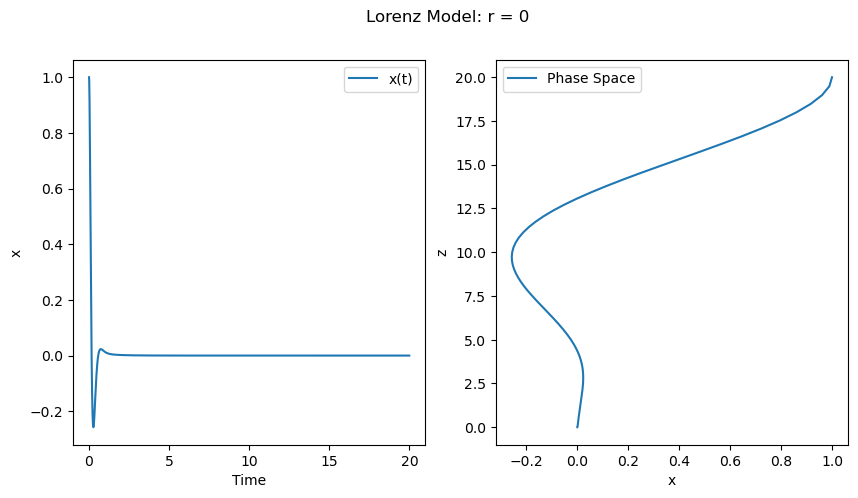

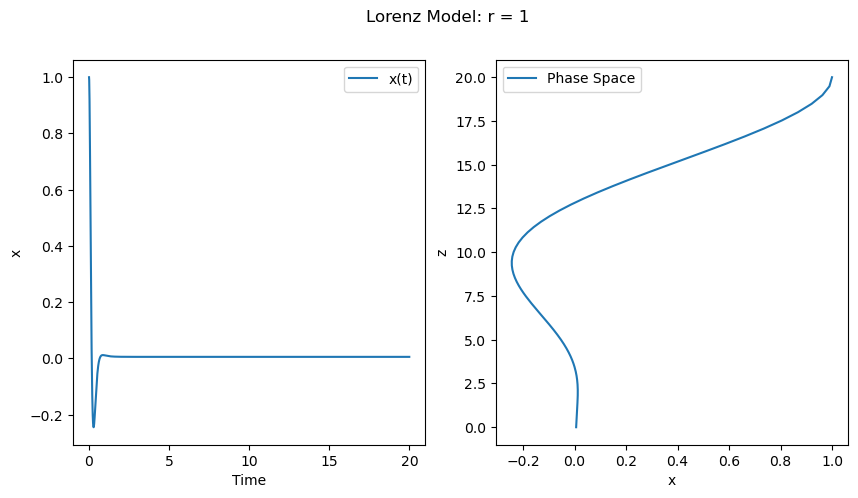

KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def lorzrk(state, t, r, o, b): #lorenz equations
    x, y, z = state
    dxdt = o * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return np.array([dxdt, dydt, dzdt])

def pecece(f_i, t_i, dt, r, o, b):
    prediction = f_i + dt * lorzrk(f_i, t_i, r, o, b) # eulers method
    corrector = f_i + 1/2 * dt * (lorzrk(f_i, t_i, r, o, b) + lorzrk(prediction, t_i + dt, r, o, b))  # PEC
    corrector_extra = f_i + 1/2 * dt * (lorzrk(f_i, t_i, r, o, b) + lorzrk(corrector, t_i + dt, r, o, b))  # PECECE
    return corrector_extra


def pec(f_i, t_i, dt, r, o, b):
    prediction = f_i + dt * lorzrk(f_i, t_i, r, o, b) # eulers method
    corrector = f_i + 1/2 * dt * (lorzrk(f_i, t_i, r, o, b) + lorzrk(prediction, t_i + dt, r, o, b))  # PEC
    return corrector

def lorenz_program(r_values, initial_state, t_max, dt, o, b):
    for r in r_values:
        t_values = np.arange(0, t_max, dt)
        f_values = [initial_state]

        for i in range(1, len(t_values)):
            t_i = t_values[i-1]
            f_i = f_values[i - 1]
            f_corrected = pec(f_i, t_i, dt, r, o, b)
            f_values.append(f_corrected)

        x_values = [f[0] for f in f_values]
        y_values = [f[1] for f in f_values]
        z_values = [f[2] for f in f_values]

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(t_values, x_values, label='x(t)')
        plt.xlabel('Time')
        plt.ylabel('x')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(x_values, z_values, label='Phase Space')
        plt.xlabel('x')
        plt.ylabel('z')
        plt.legend()

        plt.suptitle(f"Lorenz Model: r = {r}")
        plt.show()

# parameters
r_values = [0, 1, 14, 20, 28, 100]
initial_state = np.array([1, 1, 20])
t_max = 20
dt = 0.01
o = 10
b = 8/3

lorenz_program(r_values, initial_state, t_max, dt, o, b)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def lorzrk(state, t, r, o, b): #lorenz equations
    x, y, z = state
    dxdt = o * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return np.array([dxdt, dydt, dzdt])

def runge_kutta_adaptive(f_0, dt, t_max, r,o,b):
    t_values = np.arange(0, t_max, dt)
    f_values = [f_0]

    for i in range(1, len(t_values)):
        t_i = t_values[i-1]
        f_i = f_values[i - 1]

        k1 = lorzrk(f_i, t_i, r,o,b)
        k2 = lorzrk(f_i + 1/5 * k1 * dt, t_i + 1/5 * dt,r,o,b)
        k3 = lorzrk(f_i + (3/40) * k1 * dt + (9/40) * k2 * dt, t_i + (3/10) * dt,r,o,b)
        k4 = lorzrk(f_i + (44/45) * k1 * dt - (56/15) * k2 * dt + (32/9) * k3 * dt, t_i + (4/5) * dt,r,o,b)
        k5 = lorzrk(f_i + (19372/6561) * k1 * dt - (25360/2187) * k2 * dt + (64448/6561) * k3 * dt - (212/729) * k4 * dt, t_i + (8/9) * dt,r,o,b)


        
        f_new = f_i + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * dt
        
        f_values.append(f_new)

    return t_values, f_values

def lorenz_program(r_values, initial_state, t_max, dt, o, b):
    for r in r_values:
        t_values, f_values = runge_kutta_adaptive(initial_state, dt, t_max, r, o, b)

        x_values = [f[0] for f in f_values]
        y_values = [f[1] for f in f_values]
        z_values = [f[2] for f in f_values]

        print(f_values)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(t_values, x_values, label='x(t)')
        plt.xlabel('Time')
        plt.ylabel('x')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(x_values, z_values, label='Phase Space')
        plt.xlabel('x')
        plt.ylabel('z')
        plt.legend()
        
        plt.suptitle(f"Lorenz Model: r = {r}")
        plt.show()

# parameters
r_values = [0, 1, 14, 20, 28, 100]
initial_state = np.array([1, 1, 20])
t_max = 20
dt = 0.01
o = 10
b = 8/3

lorenz_program(r_values, initial_state, t_max, dt, o, b)